<a href="https://colab.research.google.com/github/3ndung/Markisa_Machine_Learning_Tyo/blob/main/Update_20_12_2022_Markisa_Tyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Latar Belakang**  

Passiflora edulis atau passion fruit atau markisa adalah buah menjalar yang banyak tumbuh di area tropis dan substropis.<br>Termasuk Indonesia, sebagai area tropis diberkahi dengan melimpah ruahnya tanaman ini.<br>Pada beberapa [Jurnal Ilmiah](https://www.frontiersin.org/articles/10.3389/fphar.2020.00617/full) disebutkan tanaman ini tinggi akan antioksidan, anti tumor dan antidiabetik <p>
Sebagai komoditas [Export](https://kominfo.jatimprov.go.id/read/umum/40546) yang diminati oleh banyak negara contohnya AS, Jepang, China dan Singapore, komoditi buah ini sangat menjanjikan,
Namun Ada Standar yang harus dipenuhi untuk komiditi export , salah satunya adalah bentuk dan tampilan buah yang baik.<p>
Machine learning atau lebih spesifiknya pendekatan deep learning Neural Network kita gunakan untuk membantu pemilihan markisa baik dan markisa kurang baik dari sisi bentuknya yang terlebih dahulu kita training untuk membedakan dua kategori tersebut.



# Objective  
1. Model Pembelajaran dari Machine learning dapat membedakan Markisa Baik dan Markisa tidak baik dengan akurasi => 0.7
2. Hanya buah Markisa untuk saat ini 
3. Menggunakan beberapa Metode Neural Network yaitu CNN, predfine-model kemudian kita akan membandingkanya
4. Masih dalam cangkupan sebelum prototyping dan produksi.
5. Pendekatan Pemodelan dilakukan dengan mennggunakan bahasa pemerograman Python dan Tesoflow Sebagai Library untama Neural Networknya.


# **Import Library Python yang akan digunakan untuk Pembelajaran**

## Pemanfaatan Pustaka Machine Learning Tensorflow yang dikembangkan oleh google

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
print(tf.__version__)
print(hub.__version__)

2.9.2
0.12.0


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt


## **Pemanggilan Gambar Markisa baik dan tidak baik sebagai dataset yang akan digunakan dalam pembelajaran**

In [ ]:
# kali ini kita coba melakukan penyimpanan clound di google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Set Train Path Only


In [ ]:
TPATH = '/content/drive/MyDrive/MARKISA/HUB/'

In [ ]:
ls $TPATH

Markisa_Kondisi_Baik/  Markisa_Kurang_Baik/


## Mensetting ukuran gambar yang akan digunakan sebagai dataset  
Dalam hal ini kita menggunakan ukuran 224 x 224 

In [ ]:
IMAGE_SHAPE = (224, 224)
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(TPATH, target_size=IMAGE_SHAPE)

Found 200 images belonging to 2 classes.


In [ ]:
for image_batch, label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 2)


**Catatan Kecil **

fungsi ImageDataGenerator diatas adalah mengkonversi gambar ke dalam format array


Karena kita hanya memiliki dua kelas yaitu Markisa baik dan kurang baik maka,label yang akan kita dapat adalah [0,1] dan [1,0]

In [ ]:
display(image_batch[:2])
display(label_batch[:2])

array([[[[0.03921569, 0.03921569, 0.03921569],
         [0.02352941, 0.02352941, 0.02352941],
         [0.01568628, 0.01568628, 0.01568628],
         ...,
         [0.02352941, 0.02352941, 0.01568628],
         [0.01568628, 0.01568628, 0.00784314],
         [0.02745098, 0.01960784, 0.02352941]],

        [[0.01960784, 0.02745098, 0.02352941],
         [0.04705883, 0.04705883, 0.04705883],
         [0.02745098, 0.02745098, 0.02745098],
         ...,
         [0.01568628, 0.01568628, 0.00784314],
         [0.02352941, 0.02352941, 0.01568628],
         [0.02352941, 0.01568628, 0.01960784]],

        [[0.03921569, 0.03921569, 0.03921569],
         [0.03137255, 0.03137255, 0.03137255],
         [0.01960784, 0.01960784, 0.01960784],
         ...,
         [0.04313726, 0.04313726, 0.03529412],
         [0.01568628, 0.01568628, 0.00784314],
         [0.03137255, 0.03137255, 0.02352941]],

        ...,

        [[0.02352941, 0.02352941, 0.02352941],
         [0.03137255, 0.03137255, 0.03137255]

array([[1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
print(label_batch[0:5])


[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


# **Pemanfaatan Ulang Arsitektur yang telah dikembangkan google**  
## mobilenet_v2

In [ ]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}

# Efficiencinet

In [ ]:
feature_extractor_url = "https://tfhub.dev/google/efficientnet/b1/classification/1" #@param {type:"string"}

In [ ]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224,224,3))

feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 1000)


if we dont want training anymore

In [ ]:
feature_extractor_layer.trainable = False

# Penggunaan Mobilenet_v2 google sebagai lapisan pada model yang akan kita kembangkan untuk Pembelajaran

Model yang kita buat berikut bersifat sequential atau berurutan , dengan input array 224x224x3 ,menggunakan Mobilenet_v2 sebagai arsitekture middle layer dan single output

In [ ]:
model = tf.keras.Sequential([
  #feature_extractor_layer, 
  hub.KerasLayer(feature_extractor_url,input_shape=(224,224,3),trainable=False),
  tf.keras.layers.Dense(image_data.num_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1000)              7856232   
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 7,858,234
Trainable params: 2,002
Non-trainable params: 7,856,232
_________________________________________________________________


In [ ]:
predictions = model(image_batch)
predictions.shape

TensorShape([32, 2])

Model kompliasi yang akan digunakan adalah Adam Optimizer, dengan fungsi error/loss yang digunakan adalah CategoricalCrossentropy dan metrik yang digunakan adalah akurasi

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []

  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['accuracy'])
    self.model.reset_metrics()

# **Lets Run**  
pada kesempatan kali ini kita akan menggunakan 10 iterasi ( tapi lebih pun tidak apa, namun jika accuraci nya tergolong baik gunakan iterasi secukupnya saja)

In [ ]:
steps_per_epoch = np.ceil(image_data.samples/image_data.batch_size)

batch_stats_callback = CollectBatchStats()

history = model.fit(image_data, epochs=4,
                              steps_per_epoch=steps_per_epoch,
                              callbacks = [batch_stats_callback])

Epoch 1/4
7/7 [==============================] - 100s 13s/step - loss: 0.1040 - accuracy: 0.9688
Epoch 2/4
7/7 [==============================] - 33s 5s/step - loss: 0.0202 - accuracy: 1.0000
Epoch 3/4
7/7 [==============================] - 34s 5s/step - loss: 0.0044 - accuracy: 1.0000
Epoch 4/4
7/7 [==============================] - 32s 5s/step - loss: 0.0085 - accuracy: 1.0000


# **Plotting Learning Curve**  
Learning Curve dibawah ini merupakan visaulisasi iterasi pembelajaran pada proses diatas

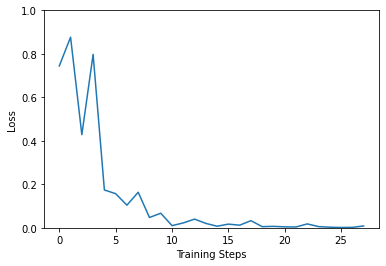

In [ ]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats_callback.batch_losses)

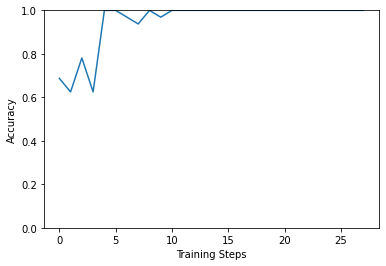

In [ ]:
plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats_callback.batch_acc)

In [ ]:
class_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Markisa_Kondisi_Baik', 'Markisa_Kurang_Baik'], dtype='<U20')

In [ ]:
class_names[0]='Markisa Kondisi Baik'
class_names[1]='Markisa Kurang Baik'

print(class_names)

['Markisa Kondisi Baik' 'Markisa Kurang Baik']


In [ ]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

1/1 [==============================] - 1s 819ms/step


In [ ]:
label_id = np.argmax(label_batch, axis=-1)

# Prediction

Bagian ini mencoba menerka apakah ini markisa baik dan tidak baik, sebagai catatan predikti adalah 20% dari total data sedangkan pembelajaran menggunakan 80% data total 

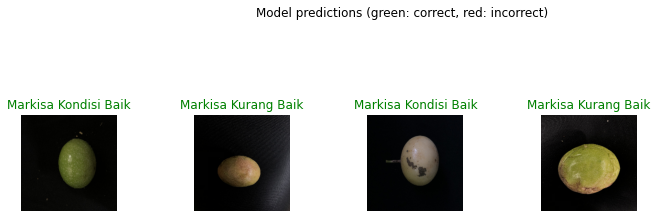

In [ ]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)
for n in range(4):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

# Menyimpan Model untuk digunakan pada implementasi Machine Learning Selanjutnya

In [ ]:
model.save('/content/drive/MyDrive/MARKISA/MODEL_EFF/Markisa_Tyo_HUB_EFF_20_12_2022')

# SAVE TO JAVASCRIPT MODEL

In [ ]:
#import tensorflowjs as tfjs

#tfjs.converters.save_keras_model(model, '/content/drive/MyDrive/MARKISA/MODEL_EFF/TFJV/')

# **RECALL THE MODEL FOR PREDICTION**

In [ ]:
model_load = tf.keras.models.load_model('/content/drive/MyDrive/MARKISA/MODEL_EFF/Markisa_Tyo_HUB_EFF_20_12_2022')

def PRDS(x):
  img = keras.preprocessing.image.load_img(tf.keras.utils.get_file( origin=x), target_size=(224, 224,3))
  plt.imshow(img)
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  predictions = model_load.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  #score = tf.nn.sigmoid(predictions[0])
  print(np.argmax(score))

  if np.argmax(score) == 1:
    print(f' KURANG BAIK {100* np.max(score)} %')
  else:
    print(f' BAIK {100* np.max(score)} %')  




# **PREDIKSION MARKISA IMAGE FROM NETWORK**

In [ ]:
TT = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRdW_p8Og9oM2EA88FMbRaCreu7mbGLoLFFHw&usqp=CAU"
T2 = 'https://s2.bukalapak.com/img/2860073951/large/Bibit_Benih_Seeds_Buah_Markisa_Kuning_Yellow_Passion_Fruit.jpg'
T3 = 'https://www.venditapiccolifrutti.it/wp-content/uploads/2017/05/Passion_fruit_red2.jpg'




1/1 [==============================] - 0s 26ms/step
1
 KURANG BAIK 100.0 %


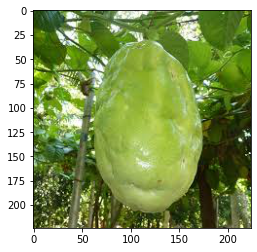

In [ ]:
PRDS(TT)

1/1 [==============================] - 0s 30ms/step
0
 BAIK 100.0 %


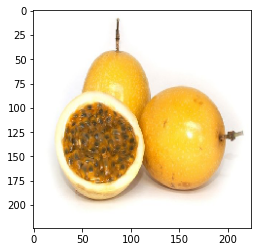

In [ ]:
PRDS(T2)

1/1 [==============================] - 0s 28ms/step
0
 BAIK 100.0 %


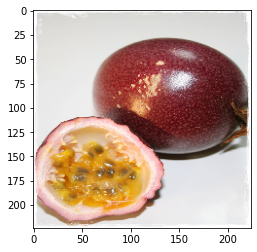

In [ ]:
PRDS(T3)